<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/3_Skills_Trend.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# How are in-demand skills trending for Data Analysts?

#### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

## Import Libraries and Data

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [72]:
df_SGPH = df[(df['job_country'] == 'Singapore') | (df['job_country'] == 'Philippines')].copy() # SG 23696 
df_SGPH 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,[sql],{'programming': ['sql']}
44,Data Scientist,Binance Accelerator Program - Data Scientist (...,Singapore,via LinkedIn,Contractor,False,Singapore,2023-04-12 13:53:26,False,False,Singapore,None,NaN,NaN,Binance,"[python, java, scala]","{'programming': ['python', 'java', 'scala']}"
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,"[sql, python, r, excel, tableau, power bi]","{'analyst_tools': ['excel', 'tableau', 'power ..."
82,Data Engineer,Cbi Application Data Design Engineer,Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-12-24 13:17:39,False,False,Singapore,None,NaN,NaN,Siemens,None,None
87,Data Scientist,Data Science Team Lead,Singapore,via LinkedIn,Full-time,False,Singapore,2023-03-23 13:47:01,False,False,Singapore,None,NaN,NaN,GovTech Singapore,"[r, python, tableau, qlik]","{'analyst_tools': ['tableau', 'qlik'], 'progra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785660,Data Scientist,Data Science Mentor,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Eskwelabs,[go],{'programming': ['go']}
785688,Business Analyst,Business Analyst,"Taguig, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-25 06:17:52,False,False,Philippines,None,NaN,NaN,Cognizant,None,None
785690,Data Scientist,Customer Master Data Specialist,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Henkel,"[vba, sap, word, powerpoint, excel]","{'analyst_tools': ['sap', 'word', 'powerpoint'..."
785733,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:17,False,False,Singapore,None,NaN,NaN,Hydra X Pte. Ltd.,"[docker, kubernetes]","{'other': ['docker', 'kubernetes']}"


## Group the Skills by Month

Select only those job postings that are for Data Analysts and the job country is the United States. Then extract the month from each job's posting date to see when jobs are listed. Next, converts a column that lists skills into a usable list format. Finally, it rearranges the data so that each skill from the list gets its own row.

In [ ]:
SGPH_DA = df_SGPH[df_SGPH['job_title_short'].isin(['Data Analyst'])]
SGPH_DA['job_posted_month_no'] = SGPH_DA['job_posted_date'].dt.month
SGPH_DA_exploded = SGPH_DA.explode('job_skills')

In [8]:
SGPH_DA_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,sql,"{'analyst_tools': ['excel', 'tableau', 'power ...",8
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,python,"{'analyst_tools': ['excel', 'tableau', 'power ...",8
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,r,"{'analyst_tools': ['excel', 'tableau', 'power ...",8
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,excel,"{'analyst_tools': ['excel', 'tableau', 'power ...",8
76,Data Analyst,Data Analyst - 14785091749,Anywhere,via Jobgether,Full-time,True,Philippines,2023-08-26 13:13:26,False,False,Philippines,None,NaN,NaN,Support Shepherd,tableau,"{'analyst_tools': ['excel', 'tableau', 'power ...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785595,Data Analyst,Data Visualization Analyst,"Pasay, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-25 06:17:52,False,False,Philippines,None,NaN,NaN,TTEC,sql,"{'analyst_tools': ['tableau', 'power bi'], 'pr...",1
785595,Data Analyst,Data Visualization Analyst,"Pasay, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-25 06:17:52,False,False,Philippines,None,NaN,NaN,TTEC,python,"{'analyst_tools': ['tableau', 'power bi'], 'pr...",1
785595,Data Analyst,Data Visualization Analyst,"Pasay, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-25 06:17:52,False,False,Philippines,None,NaN,NaN,TTEC,r,"{'analyst_tools': ['tableau', 'power bi'], 'pr...",1
785595,Data Analyst,Data Visualization Analyst,"Pasay, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-25 06:17:52,False,False,Philippines,None,NaN,NaN,TTEC,tableau,"{'analyst_tools': ['tableau', 'power bi'], 'pr...",1


### Pivot in Prep for Plotting

Create a pivot table from the `SGPH_DA_exploded`, setting 'month' as the index, `job_skills` as the columns, and fills missing entries with zero.

In [22]:
SGPH_DA_pivot = SGPH_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

job_skills
airflow      64
airtable     10
alteryx     217
angular      13
ansible       5
           ... 
wire          5
word        869
wrike         2
yarn         21
zoom         15
Length: 183, dtype: int64

#### Sort columns by count and change month numbers to names

It adds a new row labeled `Total` that sums up counts across all months for each skill. Finally, it reorders the columns based on the total counts, displaying them from highest to lowest, and shows the updated pivot table. 

In [50]:
SGPH_DA_pivot.loc['Total'] = SGPH_DA_pivot.sum()
SGPH_DA_pivot = SGPH_DA_pivot[SGPH_DA_pivot.loc['Total'].sort_values(ascending=False).index]
SGPH_DA_pivot.drop('Total', inplace=True)
SGPH_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,oracle,...,theano,chef,symphony,svn,ionic,julia,puppet,node.js,objective-c,firestore
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,613,520,478,351,212,209,158,109,115,48,...,0,1,0,0,0,0,0,0,0,0
2,376,317,288,192,147,117,72,78,61,43,...,0,0,0,1,0,0,0,0,0,0
3,447,348,306,289,172,144,112,80,73,47,...,0,0,0,0,0,1,0,0,0,0
4,388,372,271,250,139,118,110,64,61,54,...,0,0,0,0,0,0,0,0,0,0
5,392,307,319,209,149,140,84,65,60,38,...,0,0,0,0,0,0,0,0,0,0
6,446,430,311,245,183,128,90,69,82,62,...,1,0,0,0,0,0,0,0,0,0
7,598,415,428,352,236,195,112,66,82,84,...,0,0,0,0,0,0,0,0,1,0
8,525,454,365,318,230,169,114,108,95,67,...,0,0,0,0,0,0,0,1,0,0
9,313,299,236,205,170,103,78,64,66,30,...,0,0,0,0,0,0,0,0,0,0


## Plot the Monthly Skill Counts

Plot a line chart of the top 5 skills for data analysts, indexed by month. It selects the first five columns and plots them. 

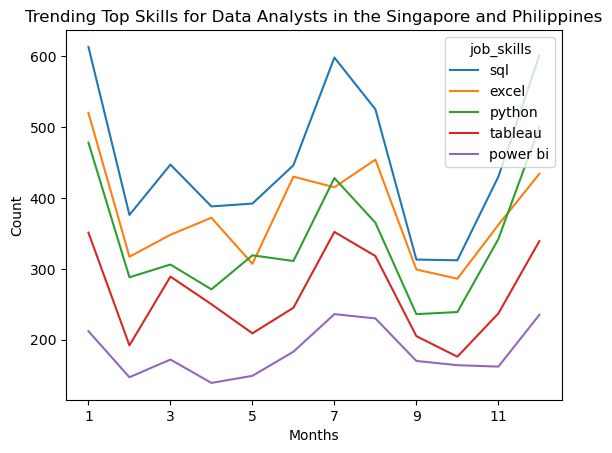

In [55]:
SGPH_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the Singapore and Philippines')
plt.ylabel('Count')
plt.xlabel('Months')
plt.show()

## Calculate Percentage of Total Jobs

Calculates the total number of entries for each month in `SGPH_DA` by grouping the data by 'month' and counting the number of occurrences in each group, storing the results in `SGPH_DA_totals`. This is needed to compute the percentages.

In [58]:
# Monthly totals
SGPH_DA_totals = SGPH_DA.groupby('job_posted_month_no').size()

This code calculates the percentage of each skill's occurrence for each month by dividing the first 12 rows of the `SGPH_DA_pivot` DataFrame, which contains skill counts, by the monthly totals in `SGPH_DA_totals` and multiplying by 100. The new DataFrame, `SGPH_DA_pct_top10`, shows skill distributions as percentages of total monthly job entries.

In [68]:
# divide first 12 rows of df_DA_pivot by DA_totals
SGPH_DA_pct_top10 = SGPH_DA_pivot.iloc[:12,:10].div(SGPH_DA_totals/100, axis=0)

# changes month number to month name
SGPH_DA_pct_top10 = SGPH_DA_pct_top10.reset_index()
SGPH_DA_pct_top10['job_posted_month'] = SGPH_DA_pct_top10['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
SGPH_DA_pct_top10 = SGPH_DA_pct_top10.set_index('job_posted_month')
SGPH_DA_pct_top10 = SGPH_DA_pct_top10.drop(columns='job_posted_month_no')

SGPH_DA_pct_top10

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,oracle
job_posted_month,,,,,,,,,,
Jan,43.911175,37.249284,34.240688,25.143266,15.186246,14.971347,11.318052,7.808023,8.237822,3.438395
Feb,49.086162,41.383812,37.597911,25.065274,19.190601,15.274151,9.399478,10.182768,7.963446,5.613577
Mar,49.832776,38.795987,34.113712,32.218506,19.175028,16.053512,12.486065,8.918618,8.138239,5.239688
Apr,45.433255,43.559719,31.733021,29.274005,16.276347,13.817330,12.880562,7.494145,7.142857,6.323185
May,50.711514,39.715395,41.267788,27.037516,19.275550,18.111255,10.866753,8.408797,7.761966,4.915912
Jun,47.046414,45.358650,32.805907,25.843882,19.303797,13.502110,9.493671,7.278481,8.649789,6.540084
Jul,55.835668,38.748833,39.962652,32.866480,22.035481,18.207283,10.457516,6.162465,7.656396,7.843137
Aug,49.388523,42.709313,34.336783,29.915334,21.636877,15.898401,10.724365,10.159925,8.936971,6.302916
Sep,43.532684,41.585535,32.823366,28.511822,23.643950,14.325452,10.848401,8.901252,9.179416,4.172462


## Plot Monthly Skill Demand 

Creates a line plot for the top five skills of data analysts, shown as percentages of the total job entries per month, using the first 5 columns of the `SGPH_DA_pct_top10` DataFrame. Also the legend is moved outside of the plot for readability.

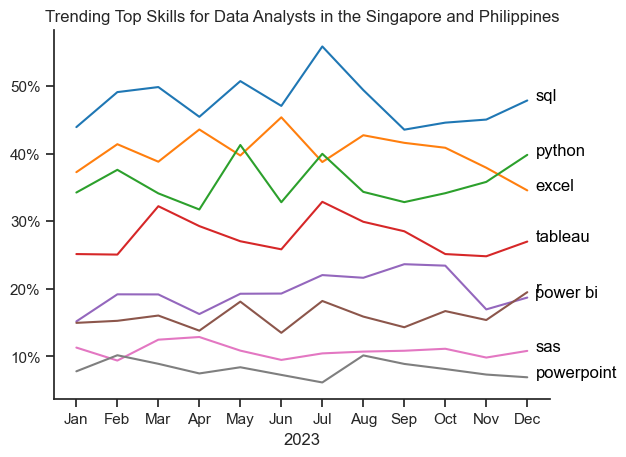

In [71]:
from matplotlib.ticker import PercentFormatter

df_plot = SGPH_DA_pct_top10.iloc[:, :8]
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
sns.set_theme(style='ticks')
sns.despine() # remove top and right spines

plt.title('Trending Top Skills for Data Analysts in the Singapore and Philippines')
plt.ylabel('')
plt.xlabel('2023')
plt.legend().remove()
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# annotate the plot with the top 5 skills using plt.text()
for i in range(8):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.show()